### import libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


import warnings
warnings.filterwarnings('ignore')

### Read in data

In [167]:
Train = pd.read_csv(r'D:\Learn\DoorDash\historical_data.csv')

In [209]:
Train.dtypes

market_id                                              float64
created_at                                              object
actual_delivery_time                                    object
store_id                                                object
store_primary_category                                  object
order_protocol                                         float64
total_items                                            float64
subtotal                                               float64
num_distinct_items                                     float64
min_item_price                                         float64
max_item_price                                         float64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                         float64
estimated_store_to_consumer_driving_duration           

In [169]:
Train.shape

(197428, 16)

In [170]:
Train.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


### Descriptive statistics

In [171]:
def create_summary_table(df):
    
    def num_missing(x):
        return len(x.index)-x.count()
    
    def pct_missing(x):
        return (len(x.index)-x.count())/x.count()

    def num_unique(x):
        return len(x.value_counts(dropna=False))

    # for numerical features
    temp_df = df.describe().T

    missing_df = pd.DataFrame(df.apply(num_missing, axis=0)) 
    missing_df.columns = ['missing']

    pct_missing_df = pd.DataFrame(df.apply(pct_missing, axis=0))
    pct_missing_df.columns = ['pct_missing']
    
    unq_df = pd.DataFrame(df.apply(num_unique, axis=0))
    unq_df.columns = ['unique']

    types_df = pd.DataFrame(df.dtypes)
    types_df.columns = ['DataType']   

    summary_df_cont = temp_df.join(missing_df).join(pct_missing_df).join(unq_df).join(types_df)
    
    # for Cat features
    col_names = list(Train.columns)
    num_cols = len(col_names)
    index = range(num_cols)
    cat_index = []

    for i in index:
        if Train.dtypes[i] == 'object':
            cat_index.append(i)

    summary_df_cat = missing_df.join(unq_df).join(types_df.iloc[cat_index], how='inner')
    summary_df_cat

    return summary_df_cont, summary_df_cat

#### Summary Table for continuous features

In [172]:
create_summary_table(Train)[0]

,count,mean,std,min,25%,50%,75%,max,missing,pct_missing,unique,DataType
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0,987,0.005024,7,float64
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0,995,0.005065,8,float64
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0,0,0.000000,57,int64
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0,0,0.000000,8368,int64
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0,0,0.000000,20,int64
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0,0,0.000000,2312,int64
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0,0,0.000000,2652,int64
total_onshift_dashers,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0,16262,0.089763,173,float64
total_busy_dashers,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0,16262,0.089763,160,float64
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0,16262,0.089763,282,float64


#### Summary Table for categorical features

In [173]:
create_summary_table(Train)[1]

,missing,unique,DataType
created_at,0,180985,object
actual_delivery_time,7,178111,object
store_id,0,6743,object
store_primary_category,4760,75,object


### Process Data

In [188]:
# create target variable
def create_target(df):
    # drop those records that have missing actual delivery time
    df = df[pd.notnull(df['actual_delivery_time'])]
    df['created_at_datetime'] = df['created_at'].astype("datetime64[s]")
    df['actual_delivery_time_datetime'] = df['actual_delivery_time'].astype("datetime64[s]")
    df['duration'] = df['actual_delivery_time_datetime'] - df['created_at_datetime']
    df['duration'] = df['duration'] / np.timedelta64(1, 's')
    return df

In [194]:
Train_with_label = create_target(Train)

In [195]:
Train_with_label.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,created_at_datetime,actual_delivery_time_datetime,duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,1239.0,33.0,14.0,21.0,446.0,861.0,2015-02-06 22:24:17,2015-02-06 23:27:16,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,1400.0,1.0,2.0,2.0,446.0,690.0,2015-02-10 21:49:25,2015-02-10 22:56:29,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,1900.0,1.0,0.0,0.0,446.0,690.0,2015-01-22 20:39:28,2015-01-22 21:09:09,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,1800.0,1.0,1.0,2.0,446.0,289.0,2015-02-03 21:21:45,2015-02-03 22:13:00,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,1100.0,1600.0,6.0,6.0,9.0,446.0,650.0,2015-02-15 02:40:36,2015-02-15 03:20:26,2390.0


In [205]:
def create_time_feature(df):
    
    #create created_at_year, created_at_month, created_at_day, created_at_date, created_at_dayOfWeek, 
    #created_at_time, created_at_hour, created_at_minute, created_at_second, created_at_isWeekend,
    #created_at_isHoliday

    df['created_at_year'], df['created_at_month'], df['created_at_day'], df['created_at_date'], df['created_at_dayOfWeek'], df['created_at_time'], df['created_at_hour'], df['created_at_minute'], df['created_at_second'] = df['created_at_datetime'].dt.year, df['created_at_datetime'].dt.month, df['created_at_datetime'].dt.day, df['created_at_datetime'].dt.date, df['created_at_datetime'].dt.dayofweek, df['created_at_datetime'].dt.time, df['created_at_datetime'].dt.hour, df['created_at_datetime'].dt.minute, df['created_at_datetime'].dt.second

    df.loc[df['created_at_dayOfWeek'].isin([5, 6]), 'created_at_isWeekend'] = 1
    df.loc[df['created_at_dayOfWeek'].isin([0, 1, 2, 3, 4]), 'created_at_isWeekend'] = 0

    cal = calendar()
    holidays = cal.holidays(start=df['created_at_date'].min(), end=df['created_at_date'].max())
    df['created_at_isHoliday'] = np.where(df.created_at_datetime.dt.normalize().isin(holidays), 1, 0)

    return df

In [283]:
Train_with_label_time = create_time_feature(Train_with_label)

In [284]:
Train_with_label_time.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,created_at_month,created_at_day,created_at_date,created_at_dayOfWeek,created_at_time,created_at_hour,created_at_minute,created_at_second,created_at_isWeekend,created_at_isHoliday
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4.0,3441.0,4.0,557.0,...,2,6,2015-02-06,4,22:24:17,22,24,17,0.0,0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1.0,1900.0,1.0,1400.0,...,2,10,2015-02-10,1,21:49:25,21,49,25,0.0,0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1.0,1900.0,1.0,1900.0,...,1,22,2015-01-22,3,20:39:28,20,39,28,0.0,0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6.0,6900.0,5.0,600.0,...,2,3,2015-02-03,1,21:21:45,21,21,45,0.0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3.0,3900.0,3.0,1100.0,...,2,15,2015-02-15,6,02:40:36,2,40,36,1.0,0


In [286]:
# check the outliers of target variable
dur = Train_with_label_time['duration'].tolist()
dur2 = [x/3600 for x in dur]
len([x for x in dur2 if x > 2])

1090

### EDA plots

In [307]:
Train_with_label_time.dtypes

market_id                                              float64
created_at                                              object
actual_delivery_time                                    object
store_id                                                object
store_primary_category                                  object
order_protocol                                         float64
total_items                                            float64
subtotal                                               float64
num_distinct_items                                     float64
min_item_price                                         float64
max_item_price                                         float64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                         float64
estimated_store_to_consumer_driving_duration           

In [275]:
# Filter duration > 7200 seconds orders, 1090 records removed
Train_with_label_time = Train_with_label_time.loc[Train_with_label_time['duration'] <= 7200]

duration_by_hour = Train_with_label_time.groupby(['created_at_hour'], as_index=False)['duration'].mean()
duration_by_dayOfWeek = Train_with_label_time.groupby(['created_at_dayOfWeek'], as_index=False)['duration'].mean()
duration_by_IsWeekend = Train_with_label_time.groupby(['created_at_isWeekend'], as_index=False)['duration'].mean()
duration_by_IsHoliday = Train_with_label_time.groupby(['created_at_isHoliday'], as_index=False)['duration'].mean()
duration_by_month = Train_with_label_time.groupby(['created_at_month'], as_index=False)['duration'].mean()



In [299]:
def create_plot(df, feature, target):
    plt.bar(df[feature], df[target], align='center', alpha=0.5)
    plt.xticks(df[feature], np.arange(len(df[feature])))
    plt.ylabel('Average ' + str(target))
    plt.xlabel(str(feature))
    plt.title('Average ' + str(target) + ' Vs ' + str(feature))
    plt.show()

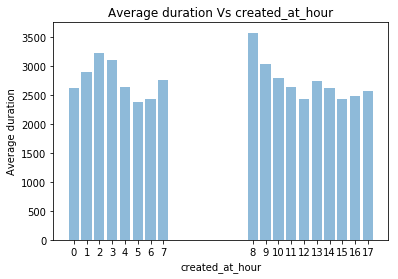

In [300]:
create_plot(duration_by_hour, 'created_at_hour', 'duration')

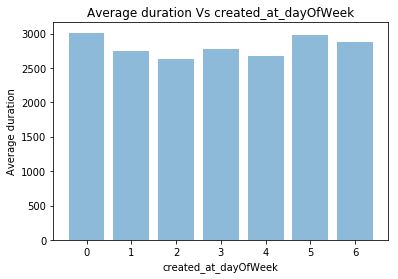

In [301]:
create_plot(duration_by_dayOfWeek, 'created_at_dayOfWeek', 'duration')

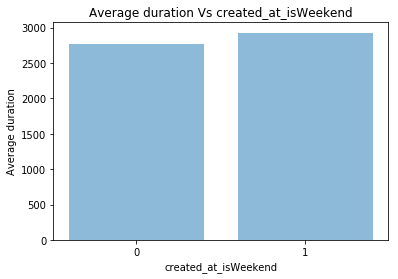

In [302]:
create_plot(duration_by_IsWeekend, 'created_at_isWeekend', 'duration')

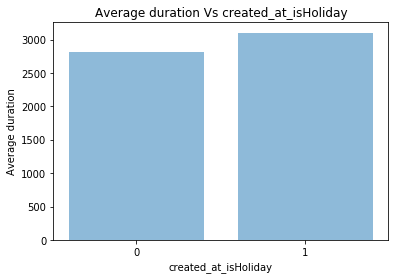

In [303]:
create_plot(duration_by_IsHoliday, 'created_at_isHoliday', 'duration')

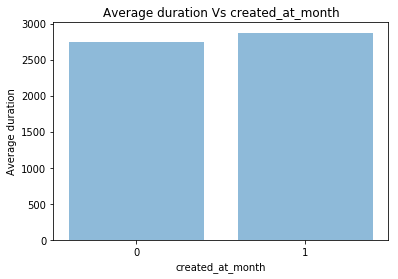

In [304]:
create_plot(duration_by_month, 'created_at_month', 'duration')